<a href="https://colab.research.google.com/github/kazirafi71/Thesis/blob/master/resume_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/drive/MyDrive/CV Sorting Project/UpdatedResumeDataSet.csv')
data.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [3]:
print(data['Category'].unique())

print("total unique category: {}". format(len(data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25


In [4]:
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


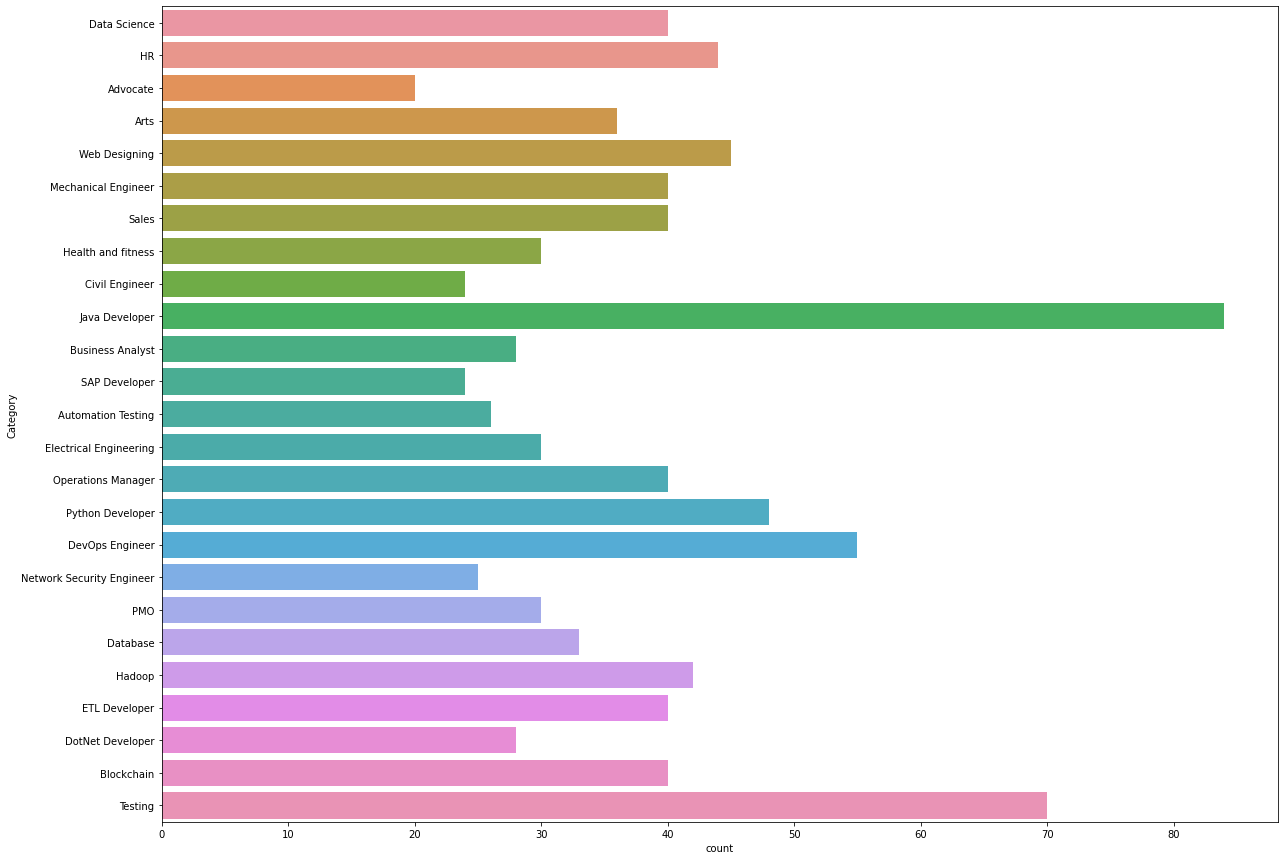

In [5]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.countplot(y="Category",data=data)

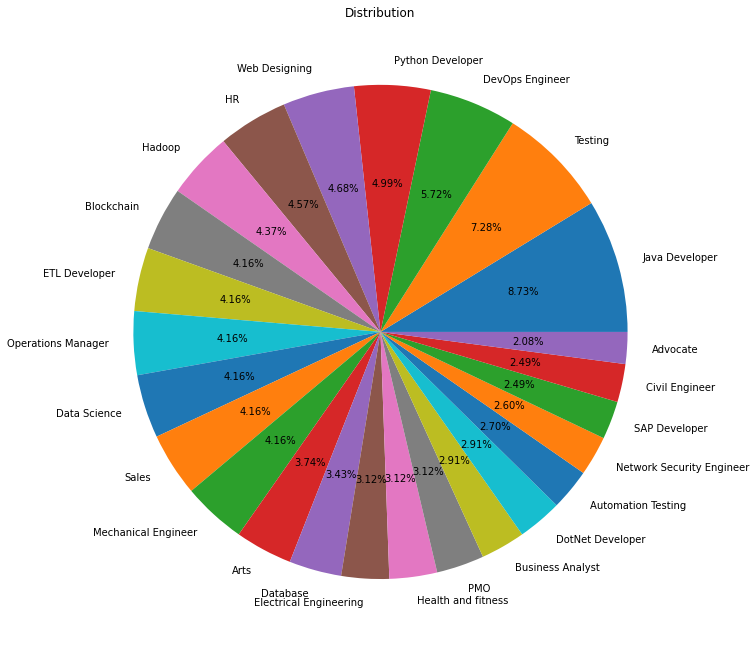

In [6]:
from matplotlib.gridspec import GridSpec
count=data['Category'].value_counts()
label=data['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [7]:
# remove the URLs, hashtags, mentions, special letters, and punctuations

import re

def clean(text):
    
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

data['clean text']=data.Resume.apply(lambda x: clean(x))

In [8]:
data['clean text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean text, Length: 962, dtype: object

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=data['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

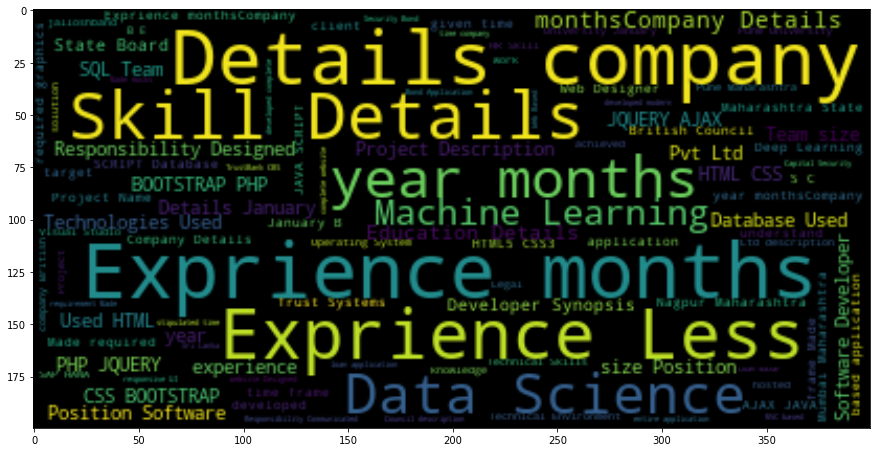

In [11]:
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

In [12]:
#Training Machine Learning Model

from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    data[i]=le.fit_transform(data[i])

In [13]:
data.head(10)

,Category,Resume,clean text
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visuali...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,Education Details B Tech Rayat and Bahra Insti...
8,6,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp t...
9,6,Expertise â Data and Quantitative Analysis â...,Expertise Data and Quantitative Analysis ...


In [14]:
le.inverse_transform([6,12])

array(['Data Science', 'HR'], dtype=object)

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

text=data['clean text'].values
terget=data['Category'].values



vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=10)

vect.fit(text)

Word_feature=vect.transform(text)

In [59]:
Word_feature

<962x10 sparse matrix of type '<class 'numpy.float64'>'
	with 6913 stored elements in Compressed Sparse Row format>

In [60]:
x_train, x_test, y_train, y_test=train_test_split(Word_feature, terget, random_state=40, test_size=0.3)




In [61]:
# multiclass  OneVsRestClassifier

import sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

model=OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)
print("training Score: {:.2f}".format(model.score(x_train, y_train)))
print("test Score: {:.2f}".format(model.score(x_test, y_test)))

training Score: 0.89
test Score: 0.80


In [62]:
prediction=model.predict(x_test)
prediction
# le.inverse_transform(prediction)

array([13, 10,  2,  2,  4, 10, 15, 16,  8, 15, 24,  8,  1, 18, 15, 23, 21,
        4,  8, 20, 15, 17, 20, 19, 22, 17, 15,  6, 15,  6, 16, 17, 15,  0,
        1, 23, 22,  8, 23, 15, 13, 15, 13, 24, 19,  4, 16, 20, 11,  9, 20,
       18, 16,  2, 15, 10, 20, 11,  1,  7, 24, 15, 23, 18, 15,  6, 16, 22,
       15, 15,  8, 14, 13, 15,  8,  2, 18,  7, 15,  8,  6,  8, 15, 15, 15,
       15,  8, 10, 19, 23, 23, 19,  3, 23, 23,  8, 22, 16, 10,  5, 15, 12,
       23, 23, 19, 12, 15, 10,  9,  9, 17, 15, 20,  4,  6, 22, 15,  5, 23,
       23, 18, 16, 20, 14, 18, 10,  3, 23,  3,  6, 17, 11,  6, 18, 10, 20,
       13,  6,  6, 15, 23,  4, 16, 24, 22, 15, 10, 19,  1, 15, 24, 13, 10,
       22,  5, 18, 16, 19, 20, 22, 12,  2,  1, 24, 22,  3, 23, 15, 13, 15,
       23,  1, 15,  1, 16,  8, 22, 23,  3,  1,  4, 17,  1, 15, 15,  1,  6,
        8, 22, 20, 10, 15, 18, 18,  6, 13, 15, 12,  2, 12,  6, 15, 20,  3,
       10, 18, 16, 22, 16,  3,  6, 18, 15, 13,  8,  5, 24,  8, 19, 21,  2,
       15, 15,  5,  3, 15

In [63]:
# multiclass  OneVsOneClassifier

import sklearn
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

model=OneVsOneClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)
prediction=model.predict(x_test)
prediction
print("training Score: {:.2f}".format(model.score(x_train, y_train)))
print("test Score: {:.2f}".format(model.score(x_test, y_test)))

training Score: 0.90
test Score: 0.82


In [64]:
# multiclass  OutputCodeClassifier

import sklearn
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier

model=OutputCodeClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)
prediction=model.predict(x_test)
prediction
print("training Score: {:.2f}".format(model.score(x_train, y_train)))
print("test Score: {:.2f}".format(model.score(x_test, y_test)))

training Score: 0.90
test Score: 0.80


In [65]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (model, metrics.classification_report(y_test, prediction)))

model report: OutputCodeClassifier(estimator=KNeighborsClassifier()): 
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.77      0.67      0.71        15
           2       0.67      0.86      0.75         7
           3       1.00      0.62      0.77        16
           4       0.86      0.86      0.86         7
           5       0.67      1.00      0.80         4
           6       0.64      0.82      0.72        11
           7       1.00      0.20      0.33        10
           8       0.88      0.93      0.90        15
           9       1.00      0.57      0.73         7
          10       0.71      1.00      0.83        12
          11       1.00      0.67      0.80         6
          12       0.71      0.42      0.53        12
          13       0.82      0.64      0.72        14
          14       1.00      0.22      0.36         9
          15       0.65      1.00      0.79        32
         

In [66]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(x_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(x_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 89.6% |
---------------------------------
| Validation Accuracy :- 80.28% |
---------------------------------


In [67]:
#MultinomialNB Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

classifier=MultinomialNB()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.291


In [68]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
score


0.2906574394463668

In [69]:
#Passive Aggressive Classifier Algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.422


In [70]:
#Random forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
random_f = RandomForestClassifier()
random_f.fit(x_train, y_train)
pred = random_f.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.958


In [71]:
#Testing one cv data

In [72]:
pip install pypdf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import PyPDF2

In [74]:
resume=PyPDF2.PdfFileReader('/content/drive/MyDrive/CV Sorting Project/ResumeOfRafi.pdf')

In [75]:
resume.getDocumentInfo()

{'/Author': 'User',
 '/Creator': 'Microsoft® Word for Microsoft 365',
 '/CreationDate': "D:20220614000727+06'00'",
 '/ModDate': "D:20220614000727+06'00'",
 '/Producer': 'Microsoft® Word for Microsoft 365'}

In [76]:
page_number=resume.getNumPages()

In [77]:
str=''
for i in range(0,page_number):
  str=str+resume.getPage(i).extract_text()

print(str)

 
  
 
 
 
 
 
 
 
 
PROFESSIONAL PROFILE  
 
 
 
I am an enthusiast in the field of Software development. I have experience in problem -solving, designing, OOP, 
web technologies, and other fields of software development. Proficient in various platforms, languages, and 
embedded systems. Experienced with the latest cutting -edge development tools and procedures. Have a good grab 
in web frameworks like Nodejs, Express, Reactjs. I am a quick learner, able to work as a team player, proactive, 
and always hungry to learn.  
 
 
EDUCATION  
 
Bangladesh University  of Professionals  January 201 9 – December  2022 
B.Sc. in Information and Communication Engineering  
CGPA: 3.8 out of 4.00 (7th semester)  
 
 
Sristy College of Tangail                                                                                                      June 2016 – December  2018                                                        
Background: Science.  
GPA: 4.67 out of 5 in all subjects i n HSC (201 8). 

In [78]:
# remove the URLs, hashtags, mentions, special letters, and punctuations

import re

def clean(text):
    
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

resume_data_rafi=clean(str)

In [79]:
resume_data_rafi

' PROFESSIONAL PROFILE I am an enthusiast in the field of Software development I have experience in problem solving designing OOP web technologies and other fields of software development Proficient in various platforms languages and embedded systems Experienced with the latest cutting edge development tools and procedures Have a good grab in web frameworks like Nodejs Express Reactjs I am a quick learner able to work as a team player proactive and always hungry to learn EDUCATION Bangladesh University of Professionals January 201 9   December 2022 B Sc in Information and Communication Engineering CGPA 3 8 out of 4 00 7th semester Sristy College of Tangail June 2016   December 2018 Background Science GPA 4 67 out of 5 in all subjects i n HSC 201 8 Tangail Sivnath High School January 20 11   January 2016 Background Science GPA 5 00 out of 5 in all subjects in SSC 201 6 SKILLS Language Proficiency Database Proficiency Framework Proficiency   JAVASCRIPT   Python   GraphQL   JAVA   C   C  

In [80]:
text=[resume_data_rafi]


vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=10)

vect.fit(text)

Word_feature=vect.transform(text)

In [81]:
Word_feature

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [82]:
prediction=model.predict(Word_feature)
prediction

array([4])

In [83]:
le.inverse_transform(prediction)

array(['Business Analyst'], dtype=object)

In [84]:
#resume data 2

In [85]:
resume_pro=PyPDF2.PdfFileReader('/content/drive/MyDrive/CV Sorting Project/resume_juanjosecarin.pdf')

In [86]:
page_number=resume_pro.getNumPages()

In [87]:
str=''
for i in range(0,page_number):
  str=str+resume_pro.getPage(i).extract_text()

print(str)

1 of 2 Juan Jose Carin  
Data Scientist   
Mountain View , CA 94041  
 650-336-4590  | juanjose.carin@gmail.com  
 linkedin.com/in/juanjosecarin  | juanjocarin.github.io  
 
Professional  Profile  
Passionate abo ut data analysis and experiments, mainly focused on user  behavior, experience , and engagement , with a solid 
background in data science and statistics, and extensive experience using data insights to drive business growth.  
Education
2016  University  of California,  Berkeley  Master  of Information  and Data  Science  GPA:  3.93
 
 
 Relevant  courses : 
• Machine  Learning  
• Machine  Learning  at Scale  
• Storing  and Retrieving  Data  • Field  Experiments  
• Applied  Regression  and Time  Series  
Analysis  
• Exploring  and Analyzing  Data  • Data  Visualization  and 
Communication  
• Research  Design  and Applications  for 
Data  Analysis  
2014 Universidad  Politécnica  de Madrid  M.S.  in Statistical  and Computational  Information  Processing  GPA:  3.69
 
 
 

In [88]:
# remove the URLs, hashtags, mentions, special letters, and punctuations

import re

def clean(text):
    
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

resume_data_pro=clean(str)

In [89]:
resume_data_pro

'1 of 2 Juan Jose Carin Data Scientist Mountain View CA 94041 650 336 4590 juanjose carin linkedin com in juanjosecarin juanjocarin github io Professional Profile Passionate abo ut data analysis and experiments mainly focused on user behavior experience and engagement with a solid background in data science and statistics and extensive experience using data insights to drive business growth Education 2016 University of California Berkeley Master of Information and Data Science GPA 3 93 Relevant courses   Machine Learning   Machine Learning at Scale   Storing and Retrieving Data   Field Experiments   Applied Regression and Time Series Analysis   Exploring and Analyzing Data   Data Visualization and Communication   Research Design and Applications for Data Analysis 2014 Universidad Polit cnica de Madrid M S in Statistical and Computational Information Processing GPA 3 69 Relevant courses   Data Mining   Multivariate Analysis   Time Series   Neural Networks and Statistical Learning   Regr

In [94]:
text=[data['clean text'][200]]


vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=10)

vect.fit(text)

Word_feature=vect.transform(text)

In [95]:
prediction=model.predict(Word_feature)
prediction

array([4])

In [96]:
le.inverse_transform(prediction)


array(['Business Analyst'], dtype=object)

In [97]:
text=["Healthcare Php Mysql Database C++ Html Email Engineering Python Ibm Programming Startup Keras Mobile Java Workflow Github Website Grab Django Javascript Css Training Communication"]

print(text)


vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=10)

vect.fit(text)

Word_feature=vect.transform(text)

['Healthcare Php Mysql Database C++ Html Email Engineering Python Ibm Programming Startup Keras Mobile Java Workflow Github Website Grab Django Javascript Css Training Communication']


In [98]:
prediction=model.predict(Word_feature)
prediction

array([4])